In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [7]:
import torch
import torch.nn as nn


In [8]:
pwd


'C:\\Users\\hp'

In [10]:
df= pd.read_csv('netflix.csv')
closed_prices = df["Close"]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4881 entries, 0 to 4880
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4881 non-null   object 
 1   High       4881 non-null   float64
 2   Low        4881 non-null   float64
 3   Open       4881 non-null   float64
 4   Close      4881 non-null   float64
 5   Volume     4881 non-null   float64
 6   Adj Close  4881 non-null   float64
dtypes: float64(6), object(1)
memory usage: 267.1+ KB


In [29]:
seq_len = 15

In [12]:
mm = MinMaxScaler()
scaled_price = mm.fit_transform(np.array(closed_prices)[... , None]).squeeze()



In [13]:
X=[]
Y=[]

In [14]:
for i in range(len(scaled_price) - seq_len):
    X.append(scaled_price[i : i+ seq_len])
    Y.append(scaled_price[i+seq_len])


In [15]:
X = np.array(X)[... , None]
Y = np.array(Y)[... ,None]

In [16]:
train_x = torch.from_numpy(X[:int(0.8*X.shape[0])]).float()
train_y = torch.from_numpy(Y[:int(0.8*Y.shape[0])]).float()
test_x = torch.from_numpy(X[:int(0.8*X.shape[0])]).float()
test_y = torch.from_numpy(Y[:int(0.8*Y.shape[0])]).float()


In [17]:
class Model(nn.Module):
    def __init__(self,input_size,hidden_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size , hidden_size,batch_first=True)
        self.fc=nn.Linear(hidden_size, 1)
    def forward(self , x):
        output,(hidden,cell)=self.lstm(x)
        return self.fc(hidden[-1,:])

In [18]:
model = Model(1,64)


In [19]:
optimizer=torch.optim.Adam(model.parameters(), lr=0.001)


In [20]:
loss_fn = nn.MSELoss()

In [21]:
num_epochs=100

In [22]:
for epoch in range(num_epochs):
    output = model(train_x)
    loss=loss_fn(output,train_y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 10==0 and epoch !=0:
        print(epoch , "epoch loss", loss.detach().numpy())



10 epoch loss 0.004990067
20 epoch loss 0.004500247
30 epoch loss 0.0039399187
40 epoch loss 0.0031492459
50 epoch loss 0.0015396364
60 epoch loss 0.0004177213
70 epoch loss 9.447892e-05
80 epoch loss 3.3187076e-05
90 epoch loss 3.7527832e-05


In [23]:
model.eval()
with torch.no_grad():
    output=model(test_x)

In [24]:
pred=mm.inverse_transform(output.numpy())
real=mm.inverse_transform(test_y.numpy())


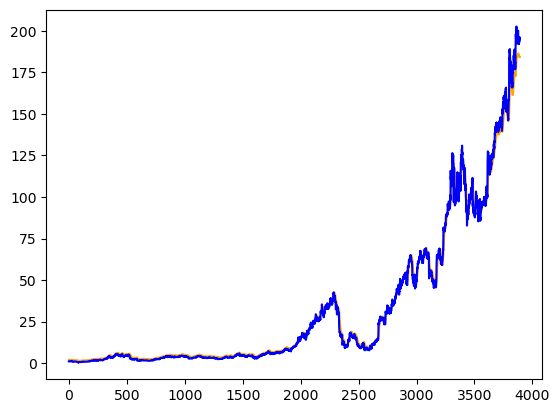

In [26]:
plt.plot(pred.squeeze(),color="orange",label="predicted")
plt.plot(real.squeeze(),color="blue",label="real")
plt.show()
